# Function Approximation

Now let's try fitting some simple functions.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()

tf.executing_eagerly()

print('Loaded TensorFlow version ' + tf.__version__)

Loaded TensorFlow version 1.13.1


Make some training and testing data

our training data and a piecewise linear interpolation of the data


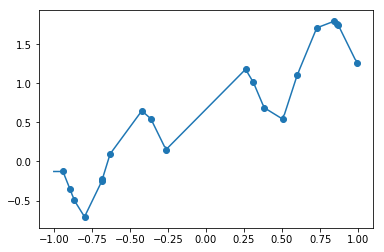

our testing data


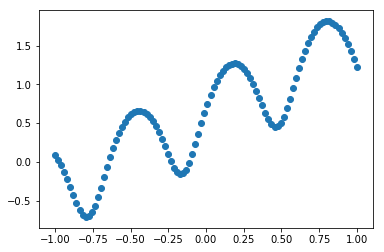

In [45]:
# number of examples for training and testing
num_train_pts = 20
num_test_pts = 100

# generate some linearly spaced points
x_test = np.linspace(-1.0, 1.0, num = num_test_pts)

# generate some uniform random samples
x_train = np.random.uniform(-1.0,1.0,num_train_pts)

# let's try to approximate y = log(sin(10x)+2) + sin(x)
y_train = np.log(np.sin(10*x_train) + 2) + np.sin(x_train)
y_test = np.log(np.sin(10*x_test) + 2) + np.sin(x_test)

print('our training data and a piecewise linear interpolation of the data')
plt.scatter(x_train,y_train)
x_train_sorted = np.sort(x_train)

indices = np.argsort(x_train)

y_train_sorted = y_train[indices[::1]]

y_interp = np.interp(x_test, x_train_sorted, y_train_sorted)
plt.plot(x_test,y_interp)
plt.show()

print('our testing data')
plt.scatter(x_test,y_test)

### Building the graph

Now let's build the computational graph

In [51]:
x = tf.convert_to_tensor(x_train, dtype = tf.float32)
y = tf.convert_to_tensor(y_train, dtype = tf.float32)

Let's define the loss function

In [54]:
# loss function
with tf.variable_scope('Loss'):
    # Mean squared error function
    loss = tf.losses.mean_squared_error(y, y_train)
